# Matrix Product State

In [1]:
using Images, Colors, MNIST

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64, ::Int64) at ./deprecated.jl:57
 [3] traindata() at /home/roger/.julia/v0.6/MNIST/src/MNIST.jl:88
 [4] include_string(::String, ::String) at ./loading.jl:522
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/roger/.julia/v0.6/IJulia/src/execute_request.jl:158
 [6] (::Compat.#inner#18{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/roger/.julia/v0.6/Compat/src/Compat.jl:378
 [7] eventloop(::ZMQ.Socket) at /home/roger/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[5], in expression starting on line 1
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64) at ./deprecated.jl:57
 [3] traindata() at /home/roger/.julia/v0.6/MNIST/src/MNIST.jl:89
 [4] include_string(::String, ::String) at ./loading.jl:522
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at

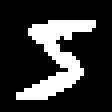

In [5]:
images, labels = traindata()
img = reshape(images[:, 1], 28, 28)
imgg = Gray.(img)